In [1]:
# To ignore future warnings
import warnings
warnings.filterwarnings('ignore')

# Install the library used for calculating LRP
# % pip install innvestigate

import innvestigate
import innvestigate.utils as iutils

Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import numpy as np
import pandas as pd


import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D
import keras.backend
import keras.layers
import keras.models
import keras.utils
from sklearn.metrics import roc_curve, auc, confusion_matrix


import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
columns = ['col{}'.format(x) for x in range (60)]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', \
                  sep=',', names = columns)
df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
data = df.drop('col59', axis = 1)
target = pd.DataFrame(df['col59'].copy())

In [5]:
stdscaler = StandardScaler()
data = stdscaler.fit_transform(data)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the train set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the train set: 0.916
Accuracy on the test set: 0.738


In [8]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [9]:
# Define the model
model = None
model = keras.Sequential()


model.add(Dense(64, input_dim=X_train.shape[1], activation='selu'))
model.add(Dense(64, activation='selu'))
model.add(Dense(32, activation='selu'))


model.add(Dense(2, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history_callback = model.fit (X_train, y_train, epochs = 7, batch_size = 10,
           validation_data=(X_test, y_test),
           verbose = 1)

scores = model.evaluate(X_test, y_test)

# Evaluate the model's performance:
print('Test log loss:', scores[0])
print('Test accuracy:', scores[1])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 166 samples, validate on 42 samples
Epoch 1/7
166/166 [==============================] - 1s 4ms/step - loss: 0.6997 - acc: 0.6114 - val_loss: 0.5212 - val_acc: 0.7976
Epoch 2/7
166/166 [==============================] - 0s 355us/step - loss: 0.4473 - acc: 0.7620 - val_loss: 0.4009 - val_acc: 0.8095
Epoch 3/7
166/166 [==============================] - 0s 405us/step - loss: 0.3528 - acc: 0.8464 - val_loss: 0.4292 - val_acc: 0.8214
Epoch 4/7
166/166 [==============================] - 0s 413us/step - loss: 0.2976 - acc: 0.8886 - val_loss: 0.4075 - val_acc: 0.8214
Epoch 5/7
166/166 [==============================] - 0s 328us/step - loss: 0.2610 - acc: 0.9307 - val_loss: 0.4044 - val_acc: 0.8452
Epoch 6/7
166/166 [==============================] - 0s 392us/step - loss: 0.2454 - acc: 0.9157 - val_loss: 0.4280 - val_acc: 0.8333
Epoch 7/7
42/42 [==============================] - 0s 76us/

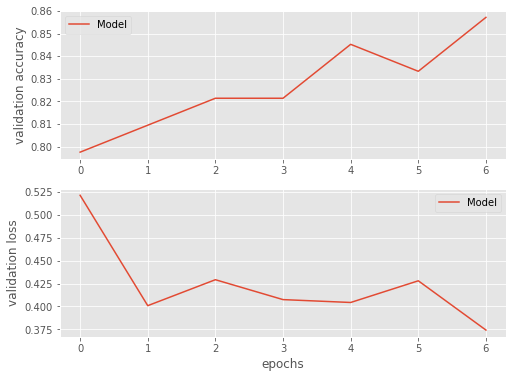

In [10]:
# Plot the accuracy
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

val_acc = history_callback.history['val_acc']
val_loss = history_callback.history['val_loss']
ax1.plot(val_acc, label="Model")
ax2.plot(val_loss, label="Model")
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

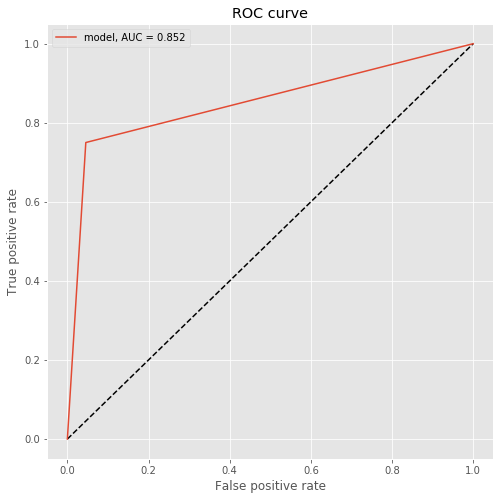

In [11]:
# Plot the ROC
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
    
Y_pred = model.predict(X_test)

real = np.argmax(y_test, axis=1)
pred = np.argmax(Y_pred, axis=1)

fpr, tpr, threshold = roc_curve(real, pred)

plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format("model", auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();